### HEALTHCARE PROVIDER FRAUD DETECTION

https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load Train Dataset

y = pd.read_csv("./data/Train-1542865627584.csv")
Train_Beneficiarydata = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

y_test = pd.read_csv("./data/Test-1542969243754.csv")
Test_Beneficiarydata = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")

Train_Inpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check Shape of datasets 

print('Shape of Train data :',y.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',y_test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [4]:
#Check missing values in each column in beneficiary data :

Train_Beneficiarydata.isna().sum()

Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [5]:
#Check missing values in each column in inpatient data :

Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [6]:
#Check missing values in each column in outpatient data :

Train_Outpatientdata.isna().sum()

Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [7]:
# Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

print("Unique values in ChronicCond_Alzheimer column: ", format(Train_Beneficiarydata['ChronicCond_Alzheimer'].unique()))

Train_Beneficiarydata = Train_Beneficiarydata.replace({'Gender': 2, 'ChronicCond_Depression': 2, 'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'ChronicCond_KidneyDisease': 2, 'ChronicCond_Alzheimer': 2,
                'ChronicCond_Heartfailure': 2, 'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2}, 0)


Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)



Unique values in ChronicCond_Alzheimer column:  [1 2]


In [8]:
# data cleaning changing Y values of RenalDiseaseIndicator to 1 to make it uniform

print("Unique values in RenalDiseaseIndicator column: ", format(Train_Beneficiarydata['RenalDiseaseIndicator'].unique()))


Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})


Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})
print("Unique values in RenalDiseaseIndicator column: ", format(Test_Beneficiarydata['RenalDiseaseIndicator'].unique()))


Unique values in RenalDiseaseIndicator column:  ['0' 'Y']
Unique values in RenalDiseaseIndicator column:  [0 1]


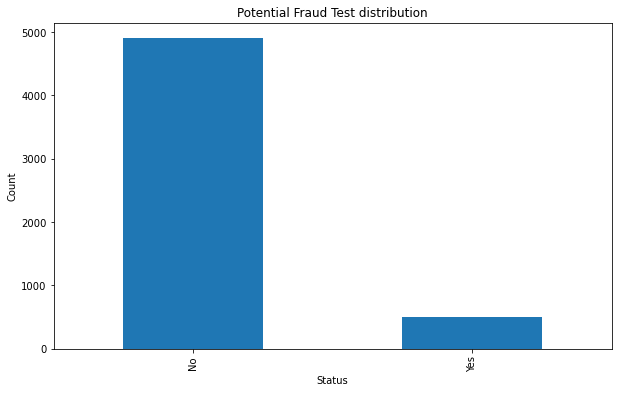

In [9]:
# Potential fraud test distrubution

plt.title("Potential Fraud Test distribution")
y.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### Adding features and combine datasets

In [10]:
Train_Beneficiarydata['DOD'].unique()

# Add Flag column 'WhetherDead' using DOD values to know whether beneficiary is dead on not

Train_Beneficiarydata['WhetherDead'] = 0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(), 'WhetherDead'] = 1

Train_Beneficiarydata['WhetherDead'].head(3)

Test_Beneficiarydata['WhetherDead'] = 0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(), 'WhetherDead'] = 1

Test_Beneficiarydata['WhetherDead'].head(3)

0    0
1    1
2    0
Name: WhetherDead, dtype: int64

In [11]:
# Adding Target numeric variable.

y["target"] = np.where(y.PotentialFraud == "Yes", 1, 0) 

y

,Provider,PotentialFraud,target
0,PRV51001,No,0
1,PRV51003,Yes,1
2,PRV51004,No,0
3,PRV51005,Yes,1
4,PRV51007,No,0
...,...,...,...
5405,PRV57759,No,0
5406,PRV57760,No,0
5407,PRV57761,No,0
5408,PRV57762,No,0


In [12]:
# Combine Inpatient and Outpatient datasets for both train and test

train_medicare = pd.merge(Train_Inpatientdata, Train_Outpatientdata, left_on= [ x for x in Train_Outpatientdata.columns if x in Train_Inpatientdata.columns], right_on = [ x for x in Train_Outpatientdata.columns if x in Train_Inpatientdata.columns], how = 'outer')

test_medicare = pd.merge(Test_Inpatientdata, Test_Outpatientdata, left_on= [ x for x in Test_Outpatientdata.columns if x in Test_Inpatientdata.columns], right_on = [ x for x in Test_Outpatientdata.columns if x in Test_Inpatientdata.columns], how = 'outer')


In [13]:
# Print shape of data 

print('All Patient Data Train : ',train_medicare.shape)
train_medicare.head()

print('All Patient Data Test : ',test_medicare.shape)
test_medicare.head(2)

All Patient Data Train :  (558211, 30)
All Patient Data Test :  (135392, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN


In [14]:
# combine benefeciary data with medicare data for patient information

train_data = pd.merge(train_medicare, Train_Beneficiarydata, left_on='BeneID', right_on='BeneID', how= 'inner')

test_data = pd.merge(test_medicare, Test_Beneficiarydata, left_on='BeneID', right_on='BeneID', how= 'inner')


In [15]:
# Print shape of data 
print('Shape of All Patient Details Train : ',train_data.shape)
train_data.head()

print('Shape of All Patient Details Test : ',test_data.shape)
test_data.head(5)

Shape of All Patient Details Train :  (558211, 55)
Shape of All Patient Details Test :  (135392, 55)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,0,1,0,0,0,21260,2136,120,100,0
1,BENE11014,CLM731858,2009-12-16,2009-12-16,PRV56558,60,PHY331420,PHY331420,PHY428520,NaN,...,0,1,0,0,0,21260,2136,120,100,0
2,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,1,1,0,1,1,22000,2136,1400,840,0
3,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,0,1,0,0,0,2000,1068,0,0,0
4,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,0,1,1,0,0,23650,2136,40,0,0


In [16]:
# check missing value percentage in full datasets

print('Percent missing values in Train Provider with patient details data :\n')
print(train_data.isnull().sum()*100/len(train_data))


Percent missing values in Train Provider with patient details data :

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnos

In [17]:
print('Percent missing values in Test Provider with patient details data :\n')
test_data.isnull().sum()*100/len(test_data)

Percent missing values in Test Provider with patient details data :



BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                

In [18]:
# Check Physicians columns for strange records and value length.
def len_check(data , l):
    S = dict()
    for i in data.columns:
         S[i] = [x for x in data.loc[ np.any(data[[i]].notnull().to_numpy(), axis = 1)][i].unique() if (len(str(x)) < l | len(str(x)) > l ) ]
    
    print(S)

len_check(test_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']], len('PHY388358')) 



{'AttendingPhysician': [], 'OperatingPhysician': [], 'OtherPhysician': []}


In [19]:
def uniq(a):
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in a.values])

In [20]:
# Create new variable 'NumPhysicians' and drop 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'

train_data['NumPhysicians'] = uniq(train_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]) 
train_data = train_data.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 1)

test_data['NumPhysicians'] = uniq(test_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]) 
test_data = test_data.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 1)


In [21]:
# Count number of procedures 'NumProc' for each claim and drop all claim columns

train_data['NumProc'] = train_data[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']].notnull().to_numpy().sum(axis = 1)

test_data['NumProc'] = test_data[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']].notnull().to_numpy().sum(axis = 1)

train_data = train_data.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis = 1)
test_data = test_data.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis = 1)


In [22]:
# Count number of claims, extra reported claims and unique.

ClmDiagnosisCode_vars =['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]

# for train data

train_data['NumClaims'] = train_data[ClmDiagnosisCode_vars].notnull().to_numpy().sum(axis = 1)

keep = ['BeneID', 'ClaimID', 'ClmAdmitDiagnosisCode', 'NumClaims'] + ClmDiagnosisCode_vars

print(train_data[keep].loc[train_data['NumClaims'] != uniq( train_data[ClmDiagnosisCode_vars])].head())

train_data['NumUniqueClaims'] = uniq(train_data[ClmDiagnosisCode_vars])

train_data['ExtraClm'] = train_data['NumClaims'] - train_data['NumUniqueClaims']

train_data = train_data.drop(ClmDiagnosisCode_vars, axis = 1)
train_data = train_data.drop(['NumClaims'], axis = 1)




       BeneID    ClaimID ClmAdmitDiagnosisCode  NumClaims  \
1   BENE11001   CLM66048                  6186          4   
35  BENE11037  CLM283913                 42731          2   
38  BENE11041   CLM54944                 49121          7   
39  BENE11041   CLM78682                 51881         10   
70  BENE11066   CLM75192                 59971         10   

   ClmAdmitDiagnosisCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
1                   6186               6186               2948   
35                 42731              42731                NaN   
38                 49121              49121               2752   
39                 51881              51881               2859   
70                 59971               5990              78829   

   ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
1               56400                NaN                NaN   
35                NaN                NaN                NaN   
38               7812              71690       

In [23]:
# for test data

test_data['NumClaims'] = test_data[ClmDiagnosisCode_vars].notnull().to_numpy().sum(axis = 1)

keep = ['BeneID', 'ClaimID', 'ClmAdmitDiagnosisCode', 'NumClaims'] + ClmDiagnosisCode_vars

print(test_data[keep].loc[test_data['NumClaims'] != uniq( test_data[ClmDiagnosisCode_vars])].head())

test_data['NumUniqueClaims'] = uniq(test_data[ClmDiagnosisCode_vars])

test_data['ExtraClm'] = test_data['NumClaims'] - test_data['NumUniqueClaims']

test_data = test_data.drop(ClmDiagnosisCode_vars, axis = 1)
test_data = test_data.drop(['NumClaims'], axis = 1)



       BeneID   ClaimID ClmAdmitDiagnosisCode  NumClaims  \
4   BENE11031  CLM56810                  8208         11   
9   BENE11127  CLM55284                 49121         10   
10  BENE11176  CLM55569                  0389         11   
31  BENE11366  CLM40966                   185          6   
32  BENE11391  CLM53392                  0389         10   

   ClmAdmitDiagnosisCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
4                   8208               8208               4168   
9                  49121              49121               3051   
10                  0389               0389              51881   
31                   185                185              25000   
32                  0389               0389              42731   

   ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
4                 920               5990              40391   
9               79431               4019              29680   
10               2752               5849             

In [24]:
# Convert Dates and calculate days for Claim and for Admission. Calculate patient age at time of claim.
# for train

train_data['AdmissionDt'] = pd.to_datetime(train_data['AdmissionDt'] , format = '%Y-%m-%d')
train_data['DischargeDt'] = pd.to_datetime(train_data['DischargeDt'],format = '%Y-%m-%d')

train_data['ClaimStartDt'] = pd.to_datetime(train_data['ClaimStartDt'] , format = '%Y-%m-%d')
train_data['ClaimEndDt'] = pd.to_datetime(train_data['ClaimEndDt'],format = '%Y-%m-%d')

train_data['DOB'] = pd.to_datetime(train_data['DOB'] , format = '%Y-%m-%d')
train_data['DOD'] = pd.to_datetime(train_data['DOD'],format = '%Y-%m-%d')

### Number of hospitalization days
train_data['AdmissionDays'] = ((train_data['DischargeDt'] - train_data['AdmissionDt']).dt.days) + 1
### Number of claim days 
train_data['ClaimDays'] = ((train_data['ClaimEndDt'] - train_data['ClaimStartDt']).dt.days) + 1

train_data['Age'] = round(((train_data['ClaimStartDt'] - train_data['DOB']).dt.days + 1)/365.25)

In [25]:
# Convert Dates and calculate days for Claim and for Admission. Calculate patient age at time of claim.
# for test

test_data['AdmissionDt'] = pd.to_datetime(test_data['AdmissionDt'] , format = '%Y-%m-%d')
test_data['DischargeDt'] = pd.to_datetime(test_data['DischargeDt'],format = '%Y-%m-%d')

test_data['ClaimStartDt'] = pd.to_datetime(test_data['ClaimStartDt'] , format = '%Y-%m-%d')
test_data['ClaimEndDt'] = pd.to_datetime(test_data['ClaimEndDt'],format = '%Y-%m-%d')

test_data['DOB'] = pd.to_datetime(test_data['DOB'] , format = '%Y-%m-%d')
test_data['DOD'] = pd.to_datetime(test_data['DOD'],format = '%Y-%m-%d')

### Number of hospitalization days
test_data['AdmissionDays'] = ((test_data['DischargeDt'] - test_data['AdmissionDt']).dt.days) + 1
### Number of claim days 
test_data['ClaimDays'] = ((test_data['ClaimEndDt'] - test_data['ClaimStartDt']).dt.days) + 1

test_data['Age'] = round(((test_data['ClaimStartDt'] - test_data['DOB']).dt.days + 1)/365.25)

In [26]:
# Hospitalization flag 'Hospt'

#train data
train_data['Hospt'] = np.where(train_data.DiagnosisGroupCode.notnull(), 1, 0)
train_data = train_data.drop(['DiagnosisGroupCode'], axis = 1)
train_data = train_data.drop(['AdmissionDt', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt', 'DOD', 'DOB'], axis = 1)

#test data
test_data['Hospt'] = np.where(test_data.DiagnosisGroupCode.notnull(), 1, 0)
test_data = test_data.drop(['DiagnosisGroupCode'], axis = 1)
test_data = test_data.drop(['AdmissionDt', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt', 'DOD', 'DOB'], axis = 1)

In [27]:
train_data.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,OPAnnualDeductibleAmt,WhetherDead,NumPhysicians,NumProc,NumUniqueClaims,ExtraClm,AdmissionDays,ClaimDays,Age,Hospt
count,558211.000000,557312.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,40474.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,0.421162,1.255011,0.196786,25.446969,378.588195,11.931472,11.93877,0.401868,...,649.698745,0.007400,1.292981,0.053557,3.239150,0.033117,6.665168,2.727940,73.301277,0.072507
std,3821.534891,274.016812,0.493746,0.717437,0.397569,15.192784,265.215531,0.889712,0.78590,0.490276,...,1002.020811,0.085707,0.505266,0.280534,2.570114,0.178991,5.638538,4.904984,13.021602,0.259325
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,0.000000
25%,40.000000,0.000000,0.000000,1.000000,0.000000,11.000000,150.000000,12.000000,12.00000,0.000000,...,120.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,68.000000,0.000000
50%,80.000000,0.000000,0.000000,1.000000,0.000000,24.000000,350.000000,12.000000,12.00000,0.000000,...,340.000000,0.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,74.000000,0.000000
75%,300.000000,0.000000,1.000000,1.000000,0.000000,38.000000,570.000000,12.000000,12.00000,1.000000,...,790.000000,0.000000,2.000000,0.000000,4.000000,0.000000,8.000000,1.000000,82.000000,0.000000
max,125000.000000,1068.000000,1.000000,5.000000,1.000000,54.000000,999.000000,12.000000,12.00000,1.000000,...,13840.000000,1.000000,3.000000,5.000000,11.000000,2.000000,36.000000,37.000000,101.000000,1.000000


In [28]:
train_data.shape

(558211, 36)

In [29]:
train_data.isnull().sum()

test_data.isnull().sum()


BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     196
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt          

In [30]:
# Fill missing results using 0

train_data = train_data.fillna(0).copy()

test_data = test_data.fillna(0).copy()


In [31]:
# group each column by provider for machine learning fraud detection (matching with target data)

# Sum all results
df1 = train_data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                  'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                                                  'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 
                                                  'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                                  'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 
                                                  'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                  'ChronicCond_stroke', 'WhetherDead', 'NumPhysicians', 
                                                  'NumProc','NumUniqueClaims', 'ExtraClm', 'AdmissionDays',
                                                  'ClaimDays', 'Hospt']].sum()
# Count number of records
df2 = train_data[['BeneID', 'ClaimID']].groupby(train_data['Provider']).nunique().reset_index()
# Calculate mean
df3 = train_data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']].mean()
# Combine all together
df = df2.merge(df1, on='Provider', how='left').merge(df3, on='Provider', how='left')
print(df.shape, y.shape)

(5410, 32) (5410, 3)


In [32]:
# group each column by provider for machine learning fraud detection (matching with target data)


### Sum all results
test_df1 = test_data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 
                                                              'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                                                              'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 
                                                              'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                                              'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 
                                                              'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke', 'WhetherDead', 'NumPhysicians', 
                                                              'NumProc','NumUniqueClaims', 'ExtraClm', 'AdmissionDays',
                                                              'ClaimDays', 'Hospt']].sum()
### Count number of records
test_df2 = test_data[['BeneID', 'ClaimID']].groupby(test_data['Provider']).nunique().reset_index()
### Calculate mean
test_df3 = test_data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']].mean()
### Combine all together
test_df = test_df2.merge(test_df1, on='Provider', how='left').merge(test_df3, on='Provider', how='left')
print(test_df.shape, y_test.shape)

(1353, 32) (1353, 1)


In [33]:
df

,Provider,BeneID,ClaimID,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,AdmissionDays,ClaimDays,Hospt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,PRV51001,24,25,104640,5340.0,8,15,19,17,5,...,30.0,61,5,12.000000,12.000000,17606.000000,897.120000,2615.200000,463.920000,78.120000
1,PRV51003,117,132,605670,66286.0,29,56,80,64,10,...,382.0,617,62,11.818182,11.871212,7568.181818,931.424242,2678.181818,737.121212,69.553030
2,PRV51004,138,149,52170,310.0,23,64,88,50,16,...,0.0,362,0,11.865772,11.959732,4351.879195,434.953020,2194.899329,622.751678,71.731544
3,PRV51005,495,1165,280910,3700.0,259,426,680,507,165,...,0.0,2433,0,11.907296,11.939914,3623.991416,379.162232,2109.733906,636.328755,70.021459
4,PRV51007,58,72,33710,3264.0,11,26,40,22,12,...,19.0,141,3,11.833333,11.833333,3050.000000,445.000000,1729.722222,469.722222,68.763889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,24,28,10640,130.0,5,14,20,15,4,...,0.0,88,0,12.000000,12.000000,3962.142857,457.714286,3241.785714,886.785714,73.428571
5406,PRV57760,9,22,4770,0.0,0,3,11,2,0,...,0.0,29,0,12.000000,11.727273,2785.454545,436.909091,1492.727273,805.454545,60.954545
5407,PRV57761,67,82,18470,370.0,23,36,56,40,14,...,0.0,196,0,12.000000,12.000000,7026.585366,586.097561,2928.414634,707.317073,71.439024
5408,PRV57762,1,1,1900,0.0,0,0,0,1,1,...,0.0,1,0,12.000000,12.000000,15000.000000,1068.000000,2540.000000,400.000000,68.000000


In [34]:
y.target.value_counts()


0    4904
1     506
Name: target, dtype: int64

### Machine learning


In [35]:
# Machine learning

# spliting dat into train and validation

X_train, X_val, y_train, y_val = train_test_split(df.drop(['Provider'], axis = 1), y.target.to_numpy(), test_size=0.25, random_state=111, stratify=y.target.to_numpy())

cols = X_train.columns

X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

X_test = StandardScaler().fit_transform(test_df.drop(['Provider'], axis = 1))


### Logistic Regression

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/mod

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9368995925317766


/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

In [37]:
logreg2=LogisticRegression(C=1000,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_val,y_val))

score 0.9283074648928308


/Users/asheshbyanju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


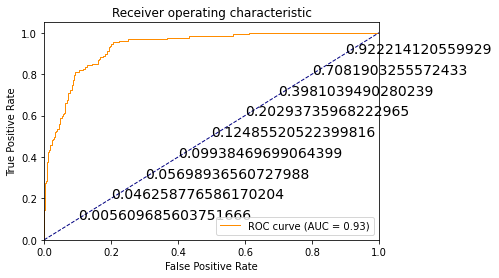

In [38]:
#Logistic regression : ROC Curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, logreg2.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic regresion : Model Evaluation


In [57]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

logreg_train_pred  = logreg2.predict(X_train)
logreg_val_pred = logreg2.predict(X_val)
cm0 = confusion_matrix(y_train, logreg_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, logreg_val_pred,labels=[1,0])
print('Confusion Matrix Validation: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Validation : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, logreg_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, logreg_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,logreg_train_pred))
print("F1-Score Validation : ",f1_score(y_val, logreg_val_pred))

Confusion Matrix Train : 
 [[ 179  200]
 [  48 3630]]
Confusion Matrix Validation: 
 [[  61   66]
 [  31 1195]]
Accuracy Train :  0.938871087010106
Accuracy Validation :  0.9283074648928308
Sensitivity :  0.48031496062992124
Specificity :  0.9747145187601958
Kappa Value : 0.5191562949963178
AUC         : 0.7275147396950585
F1-Score Train 0.5907590759075908
F1-Score Validation :  0.5570776255707763


In [40]:
pred = logreg2.predict(X_test)

test_pred = pd.DataFrame(pred)

Replacement = {1:'Yes',0:'No'}

Labels=test_pred[0].apply(lambda x : Replacement[x])

y_test['PotentialFraud'] = Labels

y_test

,Provider,PotentialFraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No
...,...,...
1348,PRV57713,No
1349,PRV57726,No
1350,PRV57745,No
1351,PRV57749,No


In [39]:
Labels.value_counts()

No     1282
Yes      71
Name: 0, dtype: int64

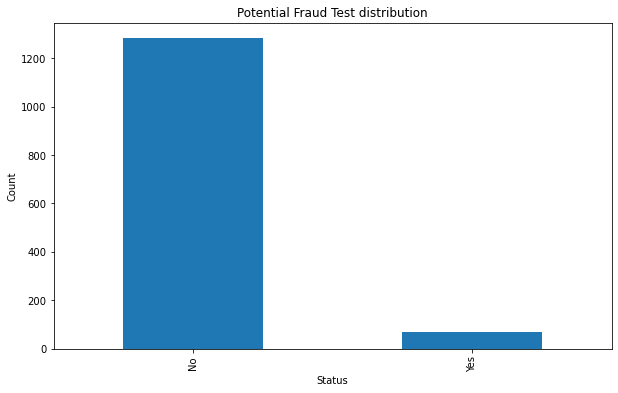

In [40]:
plt.title("Potential Fraud Test distribution")
y_test.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [41]:
#write Submission file

y_test.to_csv("Submission_logistic_regression.csv",index=False)

### Random Forest

In [42]:
rf=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [43]:
CV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [44]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=5, criterion='entropy')
rfc1.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=42)

In [45]:
print("score",rfc1.score(X_val,y_val))

score 0.9238728750923872


### Random Forest : ROC Curve

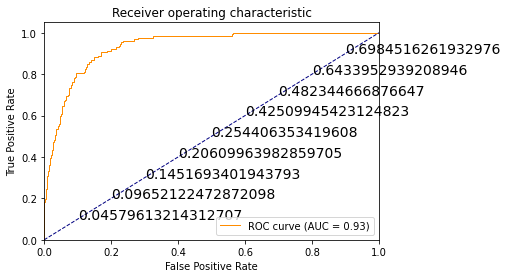

In [46]:
#Random Forest : ROC Curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, rfc1.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest : Model Evaluation

In [47]:

#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

rfc_train_pred  = rfc1.predict(X_train)
rfc_val_pred = rfc1.predict(X_val)
cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Confusion Matrix Validation: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Validation : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, rfc_val_pred))

Confusion Matrix Train : 
 [[ 195  184]
 [  32 3646]]
Confusion Matrix Validation: 
 [[  55   72]
 [  31 1195]]
Accuracy Train :  0.9467586886862214
Accuracy Validation :  0.9238728750923872
Sensitivity :  0.4330708661417323
Specificity :  0.9747145187601958
Kappa Value : 0.4767726069571421
AUC         : 0.7038926924509641
F1-Score Train 0.6435643564356436
F1-Score Validation :  0.5164319248826292


In [48]:
pred = rfc1.predict(X_test)

test_pred = pd.DataFrame(pred)

Replacement = {1:'Yes',0:'No'}

Labels=test_pred[0].apply(lambda x : Replacement[x])

y_test['PotentialFraud'] = Labels

y_test

,Provider,PotentialFraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No
...,...,...
1348,PRV57713,No
1349,PRV57726,No
1350,PRV57745,No
1351,PRV57749,No


In [49]:
Labels.value_counts()

No     1291
Yes      62
Name: 0, dtype: int64

In [50]:
#write Submission file

y_test.to_csv("Submission_random_forest.csv",index=False)

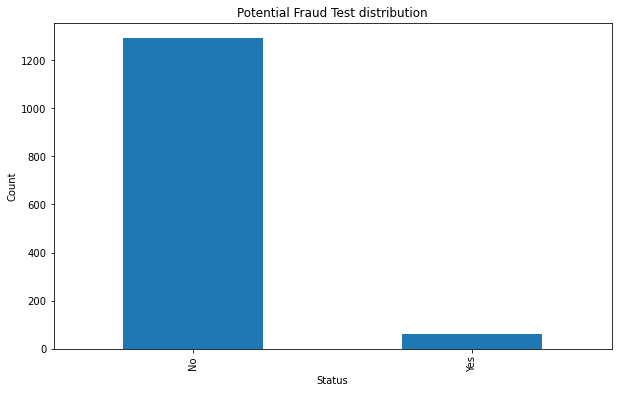

In [55]:
plt.title("Potential Fraud Test distribution")
y_test.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### Other Models and their Performance

In [51]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [54]:
LR = LogisticRegression(solver='lbfgs', random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555)
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       #'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Validation Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_val), y_val)))

5-fold cross validation:

Train CV Accuracy: 0.935 (+/- 0.009) [Logistic Regression]
Validation Accuracy: 0.9283 
Train CV Accuracy: 0.933 (+/- 0.004) [Random Forest]
Validation Accuracy: 0.9231 
Train CV Accuracy: 0.931 (+/- 0.007) [KNeighbors]
Validation Accuracy: 0.9217 
Train CV Accuracy: 0.904 (+/- 0.009) [Decision Tree]
Validation Accuracy: 0.8744 
Train CV Accuracy: 0.931 (+/- 0.006) [Ada Boost]
Validation Accuracy: 0.9165 
Train CV Accuracy: 0.935 (+/- 0.004) [Bagging]
Validation Accuracy: 0.9283 
Train CV Accuracy: 0.934 (+/- 0.009) [Gradient Boosting]
Validation Accuracy: 0.8980 
Train CV Accuracy: 0.931 (+/- 0.008) [XGBoost]
Validation Accuracy: 0.9246 
